In [1]:
### ANOVA correlation coefficient (linear).
### Kendall’s rank coefficient (nonlinear).

In [2]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots

import netCDF4 as nc
import numpy as np
import xarray as xr
import pandas as pd
from eofs.xarray import Eof

import matplotlib
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import pickle
import joblib

C:\Users\yzh086\Anaconda3\envs\work_env\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [5]:
### Import target and features ###

dataset = pd.read_csv(r'C:\Users\yzh086\OneDrive - University of Bergen\PhD_lit\PhD_lit\task1\result\cluster_data\input_output.csv', index_col="Time")
dataset = dataset.drop(columns=['Unnamed: 0'])

dataset_temp = dataset.drop(index = '1919-12-01 00:00:00',axis = 1)
dataset_new = dataset_temp

feature_set = pd.read_csv(r'C:\Users\yzh086\OneDrive - University of Bergen\PhD_lit\PhD_lit\task1\result\featureset\features.csv'
                    ,index_col=0)

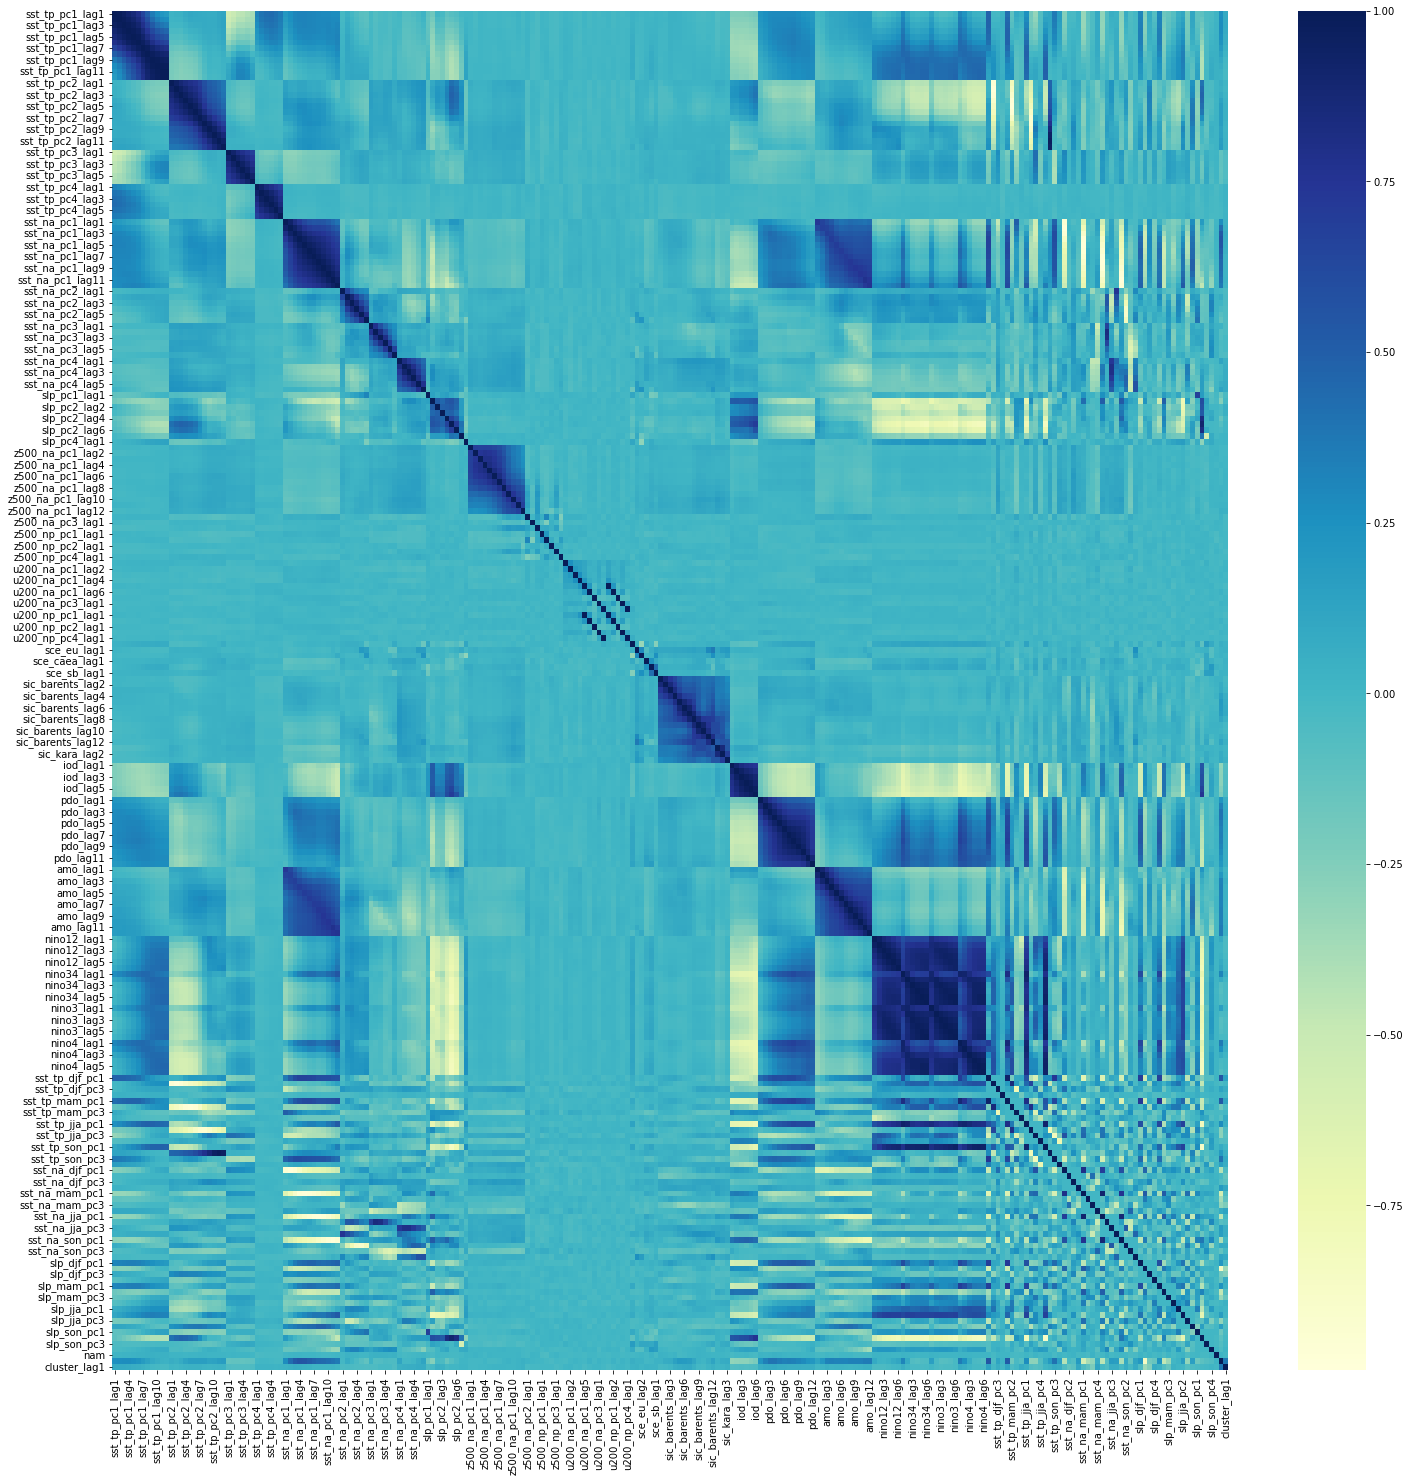

In [87]:
import seaborn as sb
plt.figure(figsize = (25,25))
dataplot = sb.heatmap(feature_set.iloc[:,:].corr(), cmap="YlGnBu")
  
# displaying heatmap

plt.show()

In [90]:
Corr_matrix['sst_tp_pc1_lag1':'sst_tp_pc1_lag12'].iloc[:,:12]

,sst_tp_pc1_lag1,sst_tp_pc1_lag2,sst_tp_pc1_lag3,sst_tp_pc1_lag4,sst_tp_pc1_lag5,sst_tp_pc1_lag6,sst_tp_pc1_lag7,sst_tp_pc1_lag8,sst_tp_pc1_lag9,sst_tp_pc1_lag10,sst_tp_pc1_lag11,sst_tp_pc1_lag12
sst_tp_pc1_lag1,1.000000,0.984965,0.954825,0.911283,0.863549,0.792219,0.655687,0.503589,0.357077,0.263623,0.217713,0.189562
sst_tp_pc1_lag2,0.984965,1.000000,0.981272,0.946569,0.907170,0.844146,0.717460,0.572537,0.430468,0.337903,0.291630,0.262629
sst_tp_pc1_lag3,0.954825,0.981272,1.000000,0.978831,0.948283,0.897149,0.786757,0.653968,0.520096,0.430036,0.383153,0.353734
sst_tp_pc1_lag4,0.911283,0.946569,0.978831,1.000000,0.982599,0.946628,0.858638,0.743210,0.620234,0.535053,0.488834,0.459339
sst_tp_pc1_lag5,0.863549,0.907170,0.948283,0.982599,1.000000,0.980668,0.914658,0.817563,0.706578,0.626507,0.581840,0.552405
sst_tp_pc1_lag6,0.792219,0.844146,0.897149,0.946628,0.980668,1.000000,0.965935,0.891735,0.798125,0.726289,0.684636,0.656302
sst_tp_pc1_lag7,0.655687,0.717460,0.786757,0.858638,0.914658,0.965935,1.000000,0.970213,0.909164,0.854149,0.819319,0.794241
sst_tp_pc1_lag8,0.503589,0.572537,0.653968,0.743210,0.817563,0.891735,0.970213,1.000000,0.976054,0.940061,0.913595,0.892765
sst_tp_pc1_lag9,0.357077,0.430468,0.520096,0.620234,0.706578,0.798125,0.909164,0.976054,1.000000,0.986207,0.968773,0.953263
sst_tp_pc1_lag10,0.263623,0.337903,0.430036,0.535053,0.626507,0.726289,0.854149,0.940061,0.986207,1.000000,0.991935,0.981222


In [62]:
Corr_matrix = feature_set.iloc[:,:].corr()

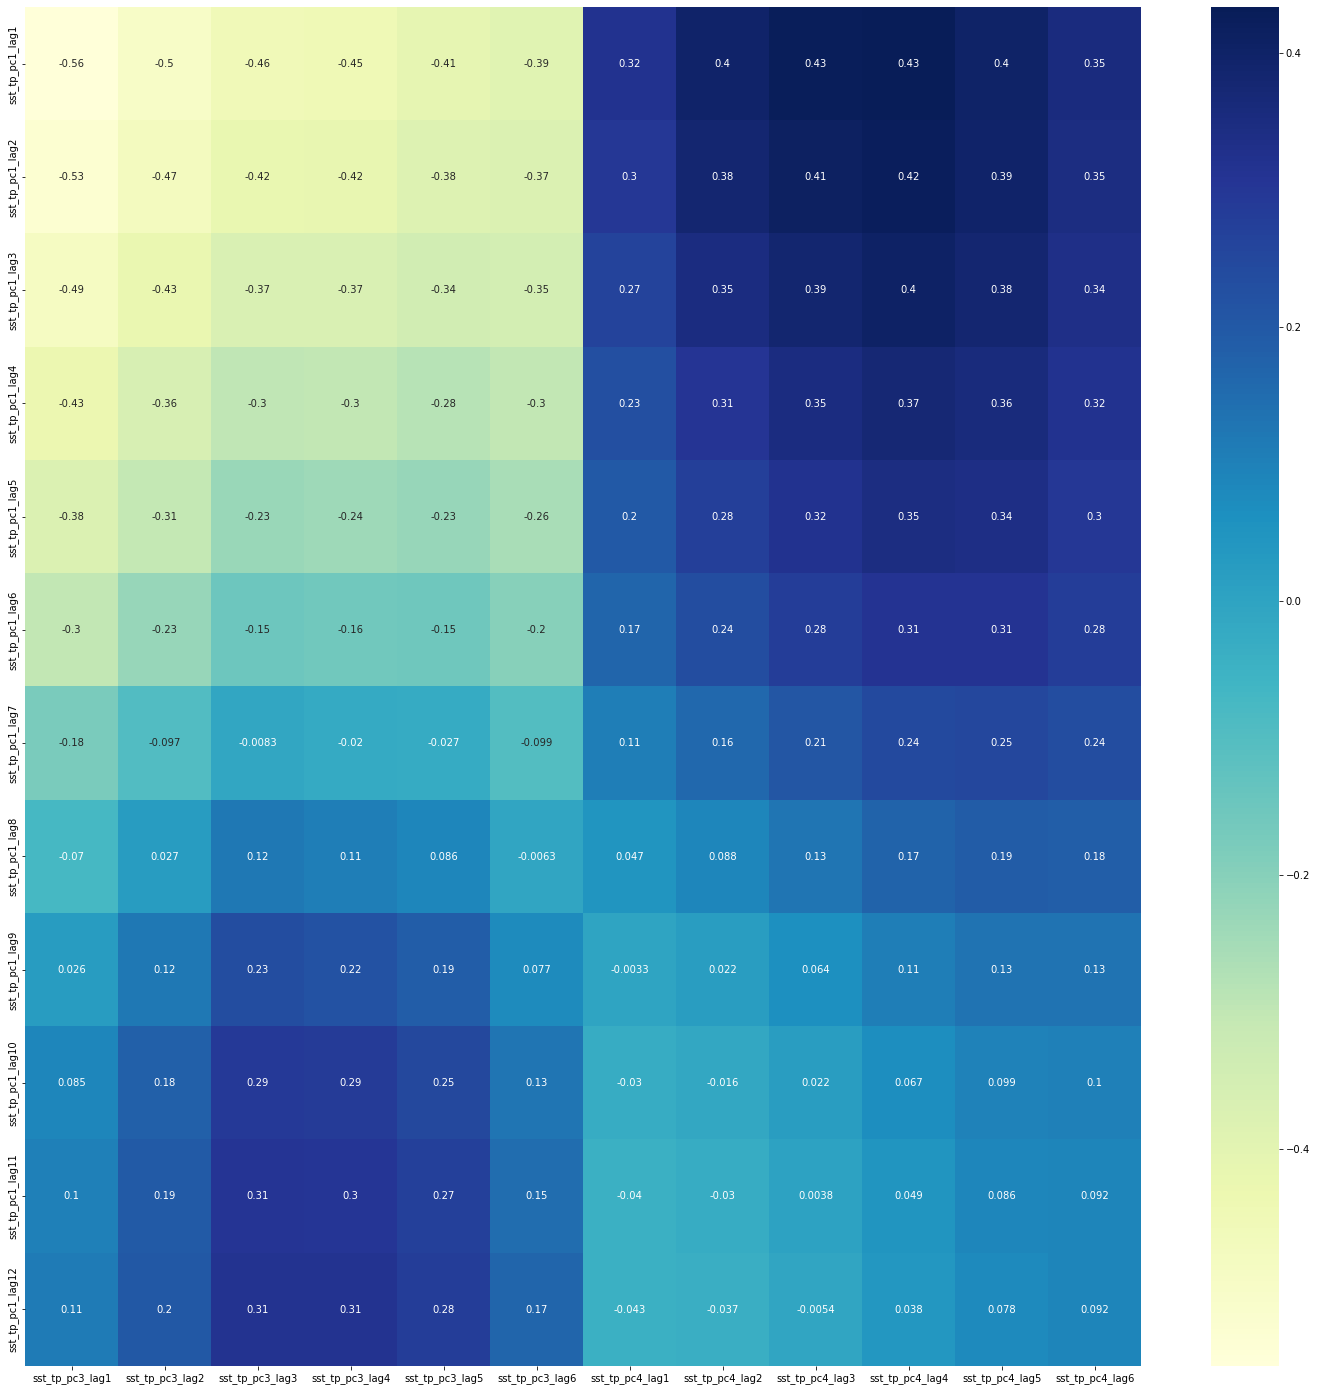

In [94]:
import seaborn as sb
plt.figure(figsize = (25,25))
dataplot = sb.heatmap(Corr_matrix['sst_tp_pc1_lag1':'sst_tp_pc1_lag12'].iloc[:,24:36], cmap="YlGnBu",annot=True)

In [68]:
np.where(Corr_matrix['amo_lag1'].values>0.5)

(array([ 36,  37,  38, 148, 149, 150, 151, 152], dtype=int64),)

In [71]:
Corr_matrix.iloc[37]

sst_tp_pc1_lag1    0.259104
sst_tp_pc1_lag2    0.250115
sst_tp_pc1_lag3    0.233513
sst_tp_pc1_lag4    0.210534
sst_tp_pc1_lag5    0.188167
                     ...   
slp_son_pc3       -0.063413
slp_son_pc4       -0.149949
nam                0.008958
nao                0.426344
cluster_lag1       0.049138
Name: sst_na_pc1_lag2, Length: 235, dtype: float64

In [72]:
Corr_matrix['amo_lag1'].values[36]

0.7319086089965254

In [44]:
feature_set.corr().iloc[0].values

sst_tp_pc1_lag1    1.000000
sst_tp_pc1_lag2    0.984965
sst_tp_pc1_lag3    0.954825
sst_tp_pc1_lag4    0.911283
sst_tp_pc1_lag5    0.863549
                     ...   
slp_son_pc3       -0.036697
slp_son_pc4       -0.034018
nam                0.013120
nao                0.255405
cluster_lag1       0.083416
Name: sst_tp_pc1_lag1, Length: 235, dtype: float64

In [106]:
### define dataset ##
X = feature_set.values # (3440, 235)
y = dataset_new.values.squeeze() # (3440,)

### find nan ###
np.where(np.isnan(X))
X[2770,152] = X[2769,152]
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [127]:
### random forest model -- feature importance ###
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# define the model
model_test = RandomForestClassifier(n_estimators=111, max_depth = 13)
# fit the model
model_test.fit(X[:-30,:50], y[:-30])
# get importance
importance_test = model_test.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_test):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()


Feature: 0, Score: 0.01781
Feature: 1, Score: 0.01779
Feature: 2, Score: 0.01932
Feature: 3, Score: 0.01830
Feature: 4, Score: 0.02010
Feature: 5, Score: 0.01770
Feature: 6, Score: 0.01931
Feature: 7, Score: 0.01714
Feature: 8, Score: 0.01984
Feature: 9, Score: 0.01790
Feature: 10, Score: 0.01928
Feature: 11, Score: 0.01896
Feature: 12, Score: 0.01940
Feature: 13, Score: 0.02010
Feature: 14, Score: 0.02108
Feature: 15, Score: 0.02058
Feature: 16, Score: 0.02076
Feature: 17, Score: 0.01939
Feature: 18, Score: 0.01978
Feature: 19, Score: 0.01901
Feature: 20, Score: 0.01943
Feature: 21, Score: 0.02097
Feature: 22, Score: 0.01974
Feature: 23, Score: 0.02019
Feature: 24, Score: 0.01969
Feature: 25, Score: 0.01997
Feature: 26, Score: 0.01938
Feature: 27, Score: 0.01992
Feature: 28, Score: 0.02099
Feature: 29, Score: 0.02191
Feature: 30, Score: 0.01922
Feature: 31, Score: 0.01854
Feature: 32, Score: 0.01852
Feature: 33, Score: 0.01885
Feature: 34, Score: 0.01948
Feature: 35, Score: 0.01783
Fe

In [141]:
y[:-30]

array([2, 3, 3, ..., 2, 2, 1], dtype=int64)

In [136]:
y_predict

array([2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [128]:
y_predict = model_test.predict(X[-30:,:50])

In [140]:
def get_acc(y, y_hat):
    return sum(yi == yi_hat for yi, yi_hat in zip(y, y_hat)) / len(y)

get_acc(y[:-30],y_predict)

0.00469208211143695

In [129]:
def get_roc(y, y_hat_prob):
    thresholds = sorted(set(y_hat_prob), reverse=True)
    ret = [[0, 0]]
    for threshold in thresholds:
        y_hat = [int(yi_hat_prob >= threshold) for yi_hat_prob in y_hat_prob]
        ret.append([get_tpr(y, y_hat), 1 - get_tnr(y, y_hat)])
    return ret

In [130]:
def get_auc(y, y_hat_prob):
    roc = iter(get_roc(y, y_hat_prob))
    tpr_pre, fpr_pre = next(roc)
    auc = 0
    for tpr, fpr in roc:
        auc += (tpr + tpr_pre) * (fpr - fpr_pre) / 2
        tpr_pre = tpr
        fpr_pre = fpr
    return auc

In [131]:
def get_tnr(y, y_hat):
    true_negative = sum(1 - (yi or yi_hat) for yi, yi_hat in zip(y, y_hat))
    actual_negative = len(y) - sum(y)
    return true_negative / actual_negative

In [143]:
def get_tpr(y, y_hat):
    true_positive = sum(yi and yi_hat for yi, yi_hat in zip(y, y_hat))
    actual_positive = sum(y)
    return true_positive / actual_positive

In [138]:
points

[[0, 0], [0.020833333333333332, 0.0], [0.08333333333333333, 0.0], [0.625, 0.0]]

In [134]:
y_predict

array([2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [137]:
y[-30:]

array([1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2,
       3, 2, 1, 2, 2, 3, 1, 2], dtype=int64)

最大得分：0.5034883720930232 子树数量为：111


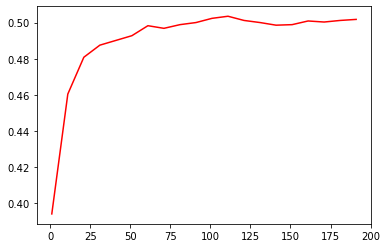

In [74]:
score_lt = []

# 每隔10步建立一个随机森林，获得不同n_estimators的得分
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X, y, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

最大得分：0.5084302325581396 子树数量为：81


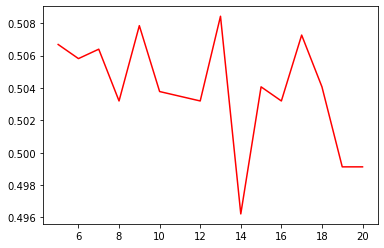

In [76]:
score_lt = []

# 每隔10步建立一个随机森林，获得不同max_depth的得分
for i in range(5,21,1):
    rfc = RandomForestClassifier(n_estimators=111,max_depth=i
                                ,random_state=90)
    score = cross_val_score(rfc, X, y, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(5,21,1)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

In [58]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=25)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(3440, 25)


In [59]:
# return the important scores #
fs.scores_

array([9.53198606e-01, 7.76338384e-01, 7.50936484e-01, 1.26348199e+00,
       1.91208873e+00, 3.12716852e+00, 5.35821739e+00, 8.01121277e+00,
       9.36278516e+00, 1.08085356e+01, 1.16306477e+01, 1.23275342e+01,
       5.40615618e+00, 9.85507462e+00, 1.16519642e+01, 1.37541551e+01,
       1.18768086e+01, 9.04321599e+00, 3.85228038e+00, 8.72787016e-01,
       8.90880998e-02, 7.18796736e-01, 1.08956011e+00, 1.86557170e-01,
       2.95289519e+00, 3.41230384e+00, 1.74763387e+00, 1.62433379e+00,
       2.12796263e+00, 1.49954049e+00, 4.24566419e-01, 3.20186097e-01,
       6.50985682e-01, 1.13290460e+00, 1.32158326e+00, 1.30302917e+00,
       1.58078151e+01, 1.33665638e+01, 9.28775789e+00, 8.88408915e+00,
       5.01932273e+00, 3.65909353e+00, 3.12068372e+00, 4.44181264e+00,
       3.33234086e+00, 1.29291142e+00, 1.10682327e+00, 6.96228489e-01,
       4.87895416e+00, 8.31782990e+00, 8.77209998e+00, 1.05857986e+01,
       9.45821807e+00, 7.45561531e+00, 4.60789377e-01, 9.32197496e-01,
      

In [60]:
## return the index from anova ##
np.where(fs.get_support()==True)

(array([ 68,  71,  72, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171,
        173, 174, 175, 176, 177, 180, 181, 182, 183, 196, 225, 229],
       dtype=int64),)

In [33]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.030)


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

'''
X, y = make_classification(n_samples=1000,
                           n_features=200,
                           n_informative=6,
                           n_redundant=10,
                           n_classes=2,
                           random_state=0
                          )
'''

#X = pd.DataFrame(X)
#y = pd.Series(y)

rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=111, max_depth = 13), 
              step=1, 
              cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(max_depth=13, n_estimators=111),
      scoring='accuracy')

In [108]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 160


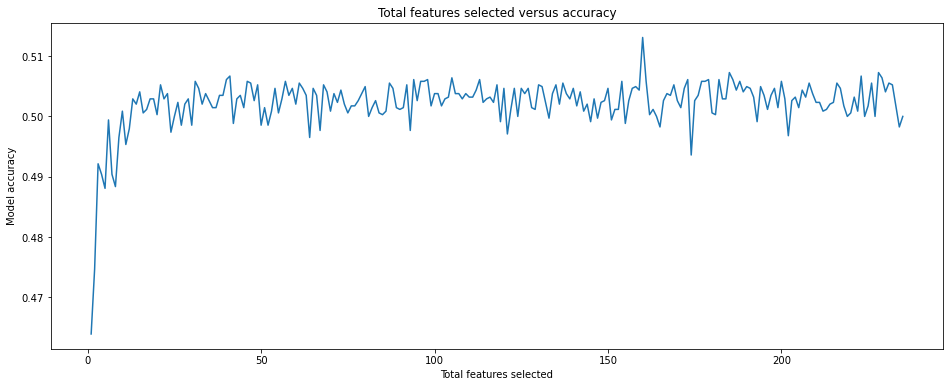

In [109]:
plt.figure(figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [112]:
rfecv.grid_scores_

array([0.46395349, 0.4747093 , 0.49215116, 0.49040698, 0.4880814 ,
       0.4994186 , 0.49040698, 0.48837209, 0.49651163, 0.50087209,
       0.49534884, 0.49796512, 0.50290698, 0.50203488, 0.50406977,
       0.5005814 , 0.50116279, 0.50290698, 0.50290698, 0.5002907 ,
       0.50523256, 0.50290698, 0.50377907, 0.49738372, 0.5       ,
       0.50232558, 0.49854651, 0.50203488, 0.50290698, 0.49854651,
       0.50581395, 0.50465116, 0.50203488, 0.50377907, 0.50261628,
       0.50145349, 0.50145349, 0.50348837, 0.50348837, 0.50610465,
       0.50668605, 0.49883721, 0.50290698, 0.50348837, 0.50145349,
       0.50581395, 0.50552326, 0.50261628, 0.50523256, 0.49854651,
       0.50145349, 0.49854651, 0.50087209, 0.50465116, 0.5005814 ,
       0.50290698, 0.50581395, 0.50348837, 0.50465116, 0.50203488,
       0.50552326, 0.50465116, 0.50348837, 0.49651163, 0.50465116,
       0.50348837, 0.49767442, 0.50523256, 0.50406977, 0.50087209,
       0.50377907, 0.50232558, 0.50436047, 0.50203488, 0.50058

In [110]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)

C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_feat

C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_feat

C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_feat

C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_feat

C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_feat

C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_feat

C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\yzh086\AppData\Local\Temp/ipykernel_2180/2649121790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_feat

,feature,support,ranking
117,117,True,1
108,108,True,1
109,109,True,1
110,110,True,1
111,111,True,1
112,112,True,1
113,113,True,1
114,114,True,1
115,115,True,1
116,116,True,1


In [345]:
feature_index = df_features[df_features['support']==True]['feature']

In [346]:
selected_feature = []
for i in range(len(np.array(feature_index))):
    selected_feature.append(feature_name[np.array(feature_index)[i]])

In [187]:
feature_set[selected_feature].to_csv(r'C:\Users\yzh086\OneDrive - University of Bergen\PhD_lit\PhD_lit\task1\result\featureset\features_RFE_RF_160.csv')

In [347]:
### TEST ###
### define dataset ##
X = feature_set[selected_feature].values # (3440, 235)
y = dataset_new.values.squeeze() # (3440,)

### find nan ###
np.where(np.isnan(X))
#X[2770,152] = X[2769,152]
#np.where(np.isnan(X))


(array([], dtype=int64), array([], dtype=int64))

In [349]:
X.shape

(3440, 160)

In [191]:
feature_set[selected_feature]

,sst_tp_pc1_lag2,sst_tp_pc1_lag4,sst_tp_pc1_lag5,sst_tp_pc2_lag1,sst_tp_pc2_lag2,sst_tp_pc2_lag6,sst_tp_pc2_lag9,sst_tp_pc2_lag10,sst_tp_pc3_lag2,sst_tp_pc3_lag4,...,slp_mam_pc4,slp_jja_pc1,slp_jja_pc3,slp_jja_pc4,slp_son_pc1,slp_son_pc2,slp_son_pc3,slp_son_pc4,nam,nao
Time,,,,,,,,,,,,,,,,,,,,,
1920-12-01 00:00:00,-0.249835,-0.583333,-0.502699,-0.055772,-0.055772,-0.436218,-1.006985,-0.910997,-1.824579,-1.421521,...,0.599031,-0.845200,1.197571,-0.528416,-0.306985,-0.145836,0.143828,-1.168099,-0.285538,-0.195750
1921-12-01 00:00:00,-0.215293,-0.164753,-0.016223,-1.339114,-1.483115,-0.221221,-0.435230,-0.880734,-0.033408,0.062157,...,2.697568,-0.263136,0.997474,-1.260323,0.524051,0.000468,1.545339,0.682309,0.340124,0.684194
1922-12-01 00:00:00,0.689870,0.571732,0.543719,-0.336776,-0.538803,-0.063406,-1.296724,-1.158143,-0.542016,-0.533492,...,0.971025,1.580055,0.053099,0.937731,-0.387406,-0.673002,-0.162652,0.943910,0.578964,0.542227
1923-12-01 00:00:00,0.468561,0.490527,0.649059,-1.003979,-1.185609,-0.477826,0.352390,0.377842,0.297363,-0.591801,...,-1.457079,0.315690,-1.839656,0.066171,1.481013,0.070344,-1.248665,1.095878,-0.253233,-0.756776
1924-12-01 00:00:00,0.667698,0.542498,0.719592,0.192767,-0.281903,-0.175373,-0.546161,-0.855547,-0.714446,-0.851853,...,-0.151009,-1.551682,-0.216920,-0.717354,-0.411287,0.057211,0.340638,-0.614778,0.422168,0.241369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-01 00:00:00,-0.563335,-0.055800,0.087937,-0.721290,-0.280128,-0.859951,-0.601039,-0.945082,0.230136,0.340418,...,0.064451,0.774773,0.601539,0.165865,0.408552,-0.466819,-0.732432,-0.887312,-1.410363,-1.299042
2002-12-01 00:00:00,0.243128,-0.098538,-0.175425,-1.731617,-1.811621,-1.435463,-2.315870,-2.018169,-1.040657,-0.129823,...,-0.568533,0.061419,-0.516456,0.456206,-1.239655,-0.267180,0.840673,0.092516,0.274789,1.241297
2003-12-01 00:00:00,-0.265017,-0.046409,-0.031520,-2.452466,-2.277820,-2.225157,-0.616202,-0.840702,-0.303394,-0.429160,...,-0.023428,-0.943405,0.539229,0.088524,0.030264,-0.136791,0.876331,-0.092240,0.862656,0.396375


In [350]:
### random forest model -- feature importance ###
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# define the model
model_test = RandomForestClassifier(n_estimators=111, max_depth = 13)
# fit the model
model_test.fit(X[:,:], y[:])
# get importance
importance_test = model_test.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_test):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature: 0, Score: 0.00636
Feature: 1, Score: 0.00572
Feature: 2, Score: 0.00579
Feature: 3, Score: 0.00532
Feature: 4, Score: 0.00540
Feature: 5, Score: 0.00581
Feature: 6, Score: 0.00556
Feature: 7, Score: 0.00598
Feature: 8, Score: 0.00605
Feature: 9, Score: 0.00630
Feature: 10, Score: 0.00538
Feature: 11, Score: 0.00597
Feature: 12, Score: 0.00616
Feature: 13, Score: 0.00614
Feature: 14, Score: 0.00504
Feature: 15, Score: 0.00604
Feature: 16, Score: 0.00604
Feature: 17, Score: 0.00652
Feature: 18, Score: 0.00687
Feature: 19, Score: 0.00825
Feature: 20, Score: 0.00617
Feature: 21, Score: 0.00523
Feature: 22, Score: 0.00654
Feature: 23, Score: 0.00605
Feature: 24, Score: 0.00671
Feature: 25, Score: 0.00618
Feature: 26, Score: 0.00505
Feature: 27, Score: 0.00605
Feature: 28, Score: 0.00606
Feature: 29, Score: 0.00659
Feature: 30, Score: 0.00520
Feature: 31, Score: 0.00630
Feature: 32, Score: 0.00773
Feature: 33, Score: 0.00639
Feature: 34, Score: 0.00595
Feature: 35, Score: 0.00628
Fe

In [351]:
df_features_importance = pd.DataFrame(importance_test,index = selected_feature,columns = ['importance_score'])

In [352]:
features_importance_rank = df_features_importance.sort_values("importance_score",ascending=False, inplace=False)

In [353]:
features_importance_rank.index

Index(['slp_pc2_lag6', 'sst_na_pc2_lag1', 'slp_son_pc2', 'slp_son_pc4',
       'slp_pc3_lag1', 'sst_na_pc4_lag4', 'pdo_lag1', 'slp_pc2_lag3',
       'swc_lag1', 'slp_djf_pc3',
       ...
       'sst_tp_pc2_lag1', 'nino3_lag6', 'sic_barents_lag7', 'sst_na_pc2_lag3',
       'sst_na_son_pc4', 'sst_na_pc4_lag2', 'sst_tp_jja_pc2',
       'sst_na_pc3_lag3', 'sst_tp_pc4_lag6', 'amo_lag6'],
      dtype='object', length=160)

In [209]:
## ranking ##
features_importance_rank.values[:10].sum()

0.08193071559712213

In [354]:
features_importance_rank

,importance_score
slp_pc2_lag6,0.011580
sst_na_pc2_lag1,0.008253
slp_son_pc2,0.008125
slp_son_pc4,0.008113
slp_pc3_lag1,0.007786
...,...
sst_na_pc4_lag2,0.005202
sst_tp_jja_pc2,0.005145
sst_na_pc3_lag3,0.005052
sst_tp_pc4_lag6,0.005039


In [192]:
### RANK Features ###
importance_test

array([0.00574356, 0.00616606, 0.006345  , 0.00494915, 0.0062981 ,
       0.00550434, 0.00600196, 0.00590213, 0.00557103, 0.00584257,
       0.00702109, 0.00589402, 0.00569951, 0.00537534, 0.00565535,
       0.00594454, 0.00658178, 0.00559195, 0.00600479, 0.00800119,
       0.00545446, 0.00635385, 0.00607936, 0.00612303, 0.00559648,
       0.00615406, 0.00513706, 0.0060792 , 0.00543404, 0.00744971,
       0.00558441, 0.0068612 , 0.00665508, 0.00749556, 0.00672313,
       0.00570509, 0.00739866, 0.00815867, 0.0064926 , 0.00651503,
       0.0109179 , 0.00684118, 0.00704163, 0.00646764, 0.00593101,
       0.00610691, 0.00549746, 0.00550753, 0.00589421, 0.00471701,
       0.00573325, 0.0065161 , 0.00546336, 0.00567227, 0.00623278,
       0.00697955, 0.00666174, 0.00720028, 0.00547208, 0.00680891,
       0.0061042 , 0.00635513, 0.00612905, 0.00639482, 0.00663727,
       0.0066725 , 0.00548243, 0.00588195, 0.00679037, 0.00534202,
       0.00630603, 0.00515279, 0.00616124, 0.00552316, 0.00649

In [ ]:
feature_rank = pd.DataFrame(index = ['rank_score'],columns = feature_set.columns)

In [271]:
feature_num=np.arange(0,235)

In [270]:
np.arange(0,235)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [275]:
test_index

array([  0,   7,   8,  16,  19,  21,  22,  23,  24,  32,  34,  35,  36,
        41,  42,  43,  56,  57,  59,  68,  77,  80,  87,  89,  91, 101,
       103, 114, 120, 121, 127, 138, 140, 151, 162, 175, 183, 188, 200,
       219, 220, 222, 224, 227, 229, 230, 231])

In [314]:
kf = KFold(n_splits=4, shuffle = True)
for train_index, test_index in kf.split(feature_num):

    selected_feature_temp = []
    for index in test_index:
        selected_feature_temp.append(feature_name[index])

In [364]:
test_index

[73,
 209,
 71,
 134,
 175,
 153,
 226,
 231,
 103,
 149,
 192,
 118,
 135,
 212,
 55,
 128,
 191,
 28,
 34,
 19,
 89,
 83,
 25,
 193,
 40,
 177,
 57,
 107,
 87,
 56,
 15,
 97,
 205,
 114,
 33,
 176,
 109,
 195,
 152,
 190,
 14,
 155,
 143,
 101,
 94,
 140,
 136,
 35,
 189,
 105,
 3,
 8,
 144,
 79,
 180,
 229,
 96,
 117,
 214,
 72,
 125,
 165,
 211,
 31,
 225,
 179,
 0,
 21,
 99,
 104,
 222,
 130,
 120,
 183,
 203,
 142,
 95,
 65,
 207,
 156,
 98,
 154,
 110,
 30,
 93,
 32,
 78,
 187,
 124,
 100,
 115,
 39,
 111,
 91,
 24,
 182,
 4,
 49,
 69,
 90,
 77,
 210,
 188,
 197,
 123,
 66,
 137,
 50,
 85,
 22,
 178,
 202,
 164,
 151,
 233,
 141,
 198,
 18,
 29,
 53,
 36,
 213,
 227,
 44,
 173,
 106,
 139,
 223,
 160,
 168,
 60,
 161,
 51,
 224,
 58,
 64,
 2,
 170,
 52,
 185,
 62,
 67,
 132,
 23,
 92,
 38,
 221,
 220,
 75,
 157,
 37,
 186,
 88,
 201,
 174,
 147,
 131,
 5,
 150,
 82]

In [366]:
test_index

[24,
 10,
 219,
 51,
 89,
 72,
 220,
 226,
 49,
 6,
 97,
 53,
 138,
 169,
 105,
 12,
 141,
 64,
 229,
 19,
 66,
 54,
 152,
 70,
 27,
 224,
 77,
 160,
 39,
 109,
 38,
 7,
 114,
 100,
 159,
 215,
 60,
 214,
 68,
 148,
 25,
 207,
 58,
 225,
 188,
 71,
 107,
 174,
 63,
 171,
 231,
 1,
 156,
 4,
 104,
 96,
 2,
 26,
 30,
 37,
 85,
 187,
 233,
 135,
 133,
 17,
 192,
 18,
 146,
 79,
 161,
 14,
 69,
 190,
 131,
 194,
 110,
 198,
 75,
 179,
 127,
 147,
 180,
 78,
 136,
 119,
 28,
 35,
 216,
 165,
 186,
 50,
 76,
 195,
 111,
 211,
 21,
 80,
 52,
 83,
 15,
 62,
 193,
 124,
 162,
 84,
 134,
 228,
 149,
 36,
 164,
 88,
 116,
 9,
 129,
 98,
 150,
 115,
 157,
 128,
 221,
 145,
 144,
 93,
 103,
 232,
 112,
 199,
 73,
 227,
 32,
 118,
 43,
 3,
 154,
 95,
 41,
 151,
 82,
 8,
 108,
 173,
 31,
 196,
 204,
 123,
 140,
 55,
 121,
 170,
 230,
 34,
 203,
 42,
 197,
 130,
 217,
 202,
 102,
 92]

In [365]:
import random

test_index = random.sample(range(0, 235), 160)
selected_feature_temp = []
for index in test_index:
    selected_feature_temp.append(feature_name[index])

In [316]:
len(selected_feature_temp)

58

In [311]:
np.zeros((1,235))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [367]:
### Monte carlo -- depend on time balance ###
from sklearn.model_selection import KFold
import random

### first monte carlo random forest and get feature importance ranking ###
num_sim = 500
top_10 = 0
top_25 = 0
top_50 = 0
top_100 = 0

feature_rank2 = pd.DataFrame(np.zeros((1,235)), index = ['rank_score'],columns = feature_set.columns)

for k in range(num_sim):

## random choose features ##
    ### 60 features ###
    #kf = KFold(n_splits=4, shuffle = True)
    #for train_index, test_index in kf.split(feature_num):
    
    ### 160 features ###
    test_index = random.sample(range(0, 235), 160)
    selected_feature_temp = []
    for index in test_index:
        selected_feature_temp.append(feature_name[index])

    ## random forest feature selection ##

    ### define dataset ##
    X = feature_set[selected_feature_temp].values # (3440, 235)
    y = dataset_new.values.squeeze() # (3440,)

    ### find nan ###
    
    #if np.where(np.isnan(X))
    #X[2770,152] = X[2769,152]
    # define the model
    model_temp = RandomForestClassifier(n_estimators=111, max_depth = 13)
    # fit the model
    model_temp.fit(X[:,:], y[:])
    # get importance
    importance_temp = model_temp.feature_importances_

    ### allocate the rank score to certain feature ###

    df_features_importance = pd.DataFrame(importance_temp,index = selected_feature_temp,columns = ['importance_score'])
    features_importance_rank = df_features_importance.sort_values("importance_score",ascending=False, inplace=False)

    ## get the index of each feature as the rank number ##
    features_importance_rank_index = features_importance_rank.index.tolist() 
    
    # return the cumulative weights -- see if the feature importance score distinctive
    top_10 += features_importance_rank.values[:10].sum()
    top_25 += features_importance_rank.values[:25].sum()
    top_50 += features_importance_rank.values[:50].sum()
    top_100 += features_importance_rank.values[:100].sum()
    
    ## return the cumulative rank ##
    for i in range(235):
        if feature_rank2.columns[i] in features_importance_rank_index:

            rank_index = features_importance_rank_index.index(feature_rank2.columns[i])

            feature_rank2.iloc[:,i] += (rank_index+1)

        else:
            feature_rank2.iloc[:,i] += 160 ### depends on the number of features

In [368]:
top_10/num_sim

0.08296998971109965

In [369]:
top_25/num_sim

0.19212328320734198

In [370]:
top_50/num_sim

0.3628765151296317

In [371]:
top_100/num_sim

0.676984482847988

In [321]:
num_sim

500

In [387]:
final_rank.to_csv(r'C:\Users\yzh086\OneDrive - University of Bergen\PhD_lit\PhD_lit\task1\result\featureset\features_MC_RF_60.csv')

In [373]:
final_rank2 = feature_rank2/num_sim

In [374]:
final_rank2.values.reshape((-1,1))

array([[131.282],
       [134.676],
       [135.322],
       [136.82 ],
       [136.588],
       [131.084],
       [139.188],
       [145.342],
       [143.33 ],
       [148.056],
       [147.944],
       [139.802],
       [128.898],
       [133.842],
       [133.684],
       [139.276],
       [134.002],
       [135.022],
       [141.604],
       [141.602],
       [136.474],
       [120.25 ],
       [132.184],
       [133.02 ],
       [124.418],
       [125.296],
       [125.818],
       [113.596],
       [124.98 ],
       [108.064],
       [104.396],
       [114.844],
       [114.916],
       [116.27 ],
       [109.736],
       [ 99.198],
       [ 82.034],
       [ 97.118],
       [133.01 ],
       [121.104],
       [146.02 ],
       [145.494],
       [146.404],
       [122.898],
       [128.514],
       [145.64 ],
       [147.078],
       [135.56 ],
       [ 58.962],
       [ 70.822],
       [ 95.362],
       [ 86.812],
       [ 83.328],
       [ 87.608],
       [ 81.474],
       [11

In [385]:
final_rank2

,sst_tp_pc1_lag1,sst_tp_pc1_lag2,sst_tp_pc1_lag3,sst_tp_pc1_lag4,sst_tp_pc1_lag5,sst_tp_pc1_lag6,sst_tp_pc1_lag7,sst_tp_pc1_lag8,sst_tp_pc1_lag9,sst_tp_pc1_lag10,...,slp_jja_pc2,slp_jja_pc3,slp_jja_pc4,slp_son_pc1,slp_son_pc2,slp_son_pc3,slp_son_pc4,nam,nao,cluster_lag1
rank_score,131.282,134.676,135.322,136.82,136.588,131.084,139.188,145.342,143.33,148.056,...,80.78,87.574,102.312,85.388,56.132,62.18,51.706,84.144,102.604,160.0


In [375]:
df_final_rank2 = pd.DataFrame(final_rank2.values.reshape((-1,1)),index = feature_rank.columns,columns = ['importance_rank'])
features_final_rank2 = df_final_rank2.sort_values("importance_rank",ascending=True, inplace=False)

In [356]:
features_final_rank.index[:25].tolist()

['slp_pc2_lag6',
 'slp_son_pc2',
 'slp_djf_pc3',
 'slp_pc2_lag4',
 'nino3_lag5',
 'slp_son_pc4',
 'iod_lag1',
 'slp_pc3_lag1',
 'slp_pc4_lag1',
 'sst_na_pc2_lag1',
 'z500_na_pc4_lag1',
 'slp_pc2_lag3',
 'sce_sb_lag1',
 'z500_na_pc2_lag1',
 'nino4_lag6',
 'nino3_lag6',
 'slp_pc2_lag5',
 'sst_na_pc4_lag4',
 'slp_djf_pc2',
 'slp_pc2_lag2',
 'nino34_lag6',
 'slp_jja_pc2',
 'sce_caea_lag1',
 'sce_caea_lag2',
 'swc_lag1']

In [376]:
features_final_rank2.index[:25].tolist()

['slp_pc2_lag6',
 'slp_son_pc4',
 'slp_son_pc2',
 'slp_djf_pc3',
 'sst_na_pc2_lag1',
 'slp_pc3_lag1',
 'slp_son_pc3',
 'slp_pc2_lag3',
 'z500_na_pc2_lag1',
 'sce_caea_lag2',
 'slp_pc4_lag1',
 'sce_sb_lag1',
 'z500_na_pc4_lag1',
 'iod_lag1',
 'slp_djf_pc2',
 'sce_eu_lag1',
 'sce_caea_lag1',
 'slp_pc2_lag2',
 'sst_na_pc2_lag2',
 'z500_na_pc3_lag1',
 'sst_na_pc4_lag4',
 'z500_np_pc3_lag1',
 'swc_lag1',
 'sst_na_djf_pc4',
 'slp_pc2_lag4']

In [357]:
features_importance_rank.index[:25].tolist()

['slp_pc2_lag6',
 'sst_na_pc2_lag1',
 'slp_son_pc2',
 'slp_son_pc4',
 'slp_pc3_lag1',
 'sst_na_pc4_lag4',
 'pdo_lag1',
 'slp_pc2_lag3',
 'swc_lag1',
 'slp_djf_pc3',
 'nino3_lag3',
 'sce_caea_lag1',
 'nino12_lag3',
 'iod_lag1',
 'slp_pc2_lag2',
 'z500_np_pc3_lag1',
 'sic_kara_lag1',
 'sst_tp_jja_pc4',
 'sst_na_mam_pc2',
 'sce_caea_lag2',
 'u200_na_pc1_lag1',
 'slp_mam_pc2',
 'sce_sb_lag1',
 'sst_na_pc1_lag9',
 'slp_pc2_lag5']

In [383]:
feature_ratio = 0
for feature in features_importance_rank.index[:10].tolist():
    if feature in features_final_rank2.index[:10].tolist():
        feature_ratio += 1

In [384]:
feature_ratio

4

In [98]:
rfe_feature = pd.read_csv(r'C:\Users\yzh086\OneDrive - University of Bergen\PhD_lit\PhD_lit\task1\result\featureset\features_RFE_RF_160.csv'
                         ,index_col=0)

In [99]:
rfe_feature

,sst_tp_pc1_lag2,sst_tp_pc1_lag4,sst_tp_pc1_lag5,sst_tp_pc2_lag1,sst_tp_pc2_lag2,sst_tp_pc2_lag6,sst_tp_pc2_lag9,sst_tp_pc2_lag10,sst_tp_pc3_lag2,sst_tp_pc3_lag4,...,slp_mam_pc4,slp_jja_pc1,slp_jja_pc3,slp_jja_pc4,slp_son_pc1,slp_son_pc2,slp_son_pc3,slp_son_pc4,nam,nao
Time,,,,,,,,,,,,,,,,,,,,,
1920-12-01 00:00:00,-0.249835,-0.583333,-0.502699,-0.055772,-0.055772,-0.436218,-1.006985,-0.910997,-1.824579,-1.421521,...,0.599031,-0.845200,1.197571,-0.528416,-0.306985,-0.145836,0.143828,-1.168099,-0.285538,-0.195750
1921-12-01 00:00:00,-0.215293,-0.164753,-0.016223,-1.339114,-1.483115,-0.221221,-0.435230,-0.880734,-0.033408,0.062157,...,2.697568,-0.263136,0.997474,-1.260323,0.524051,0.000468,1.545339,0.682309,0.340124,0.684194
1922-12-01 00:00:00,0.689870,0.571732,0.543719,-0.336776,-0.538803,-0.063406,-1.296724,-1.158143,-0.542016,-0.533492,...,0.971025,1.580055,0.053099,0.937731,-0.387406,-0.673002,-0.162652,0.943910,0.578964,0.542227
1923-12-01 00:00:00,0.468561,0.490527,0.649059,-1.003979,-1.185609,-0.477826,0.352390,0.377842,0.297363,-0.591801,...,-1.457079,0.315690,-1.839656,0.066171,1.481013,0.070344,-1.248665,1.095878,-0.253233,-0.756776
1924-12-01 00:00:00,0.667698,0.542498,0.719592,0.192767,-0.281903,-0.175373,-0.546161,-0.855547,-0.714446,-0.851853,...,-0.151009,-1.551682,-0.216920,-0.717354,-0.411287,0.057211,0.340638,-0.614778,0.422168,0.241369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-01 00:00:00,-0.563335,-0.055800,0.087937,-0.721290,-0.280128,-0.859951,-0.601039,-0.945082,0.230136,0.340418,...,0.064451,0.774773,0.601539,0.165865,0.408552,-0.466819,-0.732432,-0.887312,-1.410363,-1.299042
2002-12-01 00:00:00,0.243128,-0.098538,-0.175425,-1.731617,-1.811621,-1.435463,-2.315870,-2.018169,-1.040657,-0.129823,...,-0.568533,0.061419,-0.516456,0.456206,-1.239655,-0.267180,0.840673,0.092516,0.274789,1.241297
2003-12-01 00:00:00,-0.265017,-0.046409,-0.031520,-2.452466,-2.277820,-2.225157,-0.616202,-0.840702,-0.303394,-0.429160,...,-0.023428,-0.943405,0.539229,0.088524,0.030264,-0.136791,0.876331,-0.092240,0.862656,0.396375


In [3]:
### model train/test on pre-selected features (top 25/50)
# selected features from RFE
rfe_feature = pd.read_csv(r'C:\Users\yzh086\OneDrive - University of Bergen\PhD_lit\PhD_lit\task1\result\featureset\features_RFE_RF_160.csv'
                      ,index_col=0)
# rank the features
rfe_feature_rank = pd.DataFrame(model_rfe.feature_importances_,index = rfe_feature.columns,columns = ['importance_rank'])
rfe_features_final_rank = rfe_feature_rank.sort_values("importance_rank",ascending=False, inplace=False)

# top 25
rfe_25=rfe_features_final_rank.index[:25].to_list()
# top 50
rfe_50=rfe_features_final_rank.index[:50].to_list()


NameError: name 'model_rfe' is not defined

In [100]:
rfe_160 = rfe_feature.columns.to_list()

In [116]:
rfe_features_final_rank.head(50)

,importance_rank
slp_pc2_lag6,0.009012
u200_na_pc1_lag1,0.008295
slp_son_pc4,0.008195
sst_na_pc2_lag1,0.007961
sce_caea_lag1,0.007858
z500_na_pc3_lag1,0.007777
sic_barents_lag3,0.007763
sce_caea_lag2,0.007551
slp_djf_pc1,0.007376
nino4_lag6,0.007375


In [119]:
rfe_features_final_rank.head(50)

,importance_rank
slp_pc2_lag6,0.010616
slp_son_pc4,0.008661
sst_na_pc2_lag1,0.008258
sic_kara_lag1,0.008021
z500_np_pc3_lag1,0.007769
slp_mam_pc2,0.007562
sce_eu_lag1,0.007529
z500_na_pc4_lag1,0.007455
sst_na_pc4_lag4,0.007441
iod_lag1,0.007389


In [12]:
# train and test data
### define dataset ##
X_train = feature_set[rfe_160].values[:2580] # (3440, 235)
#X_train = feature_set.values[:2580] # (3440, 235)
y_train = dataset_new.values.squeeze()[:2580] # (3440,)
X_test = feature_set[rfe_160].values[2580:] # (3440, 235)
y_test = dataset_new.values.squeeze()[2580:] # (3440,)

### find nan ###
np.where(np.isnan(X_train))
np.where(np.isnan(X_test))

(array([190], dtype=int64), array([108], dtype=int64))

In [21]:
X_test.shape

(860, 160)

In [101]:
### random forest model -- feature importance ###
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model_rfe = RandomForestClassifier(n_estimators=111, max_depth = 13)
# fit the model -- train
model_rfe.fit(X_train[:,:], y_train[:])

RandomForestClassifier(max_depth=13, n_estimators=111)

In [102]:
# test
model_rfe.score(X_train,y_train)

0.9922480620155039

In [103]:
model_rfe.score(X_test,y_test)

0.5209302325581395

In [22]:
# selected features from MC
MC_feature = pd.read_csv(r'C:\Users\yzh086\OneDrive - University of Bergen\PhD_lit\PhD_lit\task1\result\featureset\features_MC_RF_160.csv'
                        ,index_col=0)
MC_feature_rank = pd.DataFrame(MC_feature.values.reshape((-1,1)),index = MC_feature.columns,columns = ['importance_rank'])
MC_features_final_rank = MC_feature_rank.sort_values("importance_rank",ascending=True, inplace=False)
# top 25
MC_25=MC_features_final_rank.index[:25].to_list()
# top 50
MC_50=MC_features_final_rank.index[:50].to_list()

In [111]:
MC_160 = MC_features_final_rank.index.to_list()

In [112]:
# train and test data
### define dataset ##
X_train = feature_set[MC_160].values[:2580] # (3440, 235)
y_train = dataset_new.values.squeeze()[:2580] # (3440,)
#X_test = feature_set[MC_50].values[2580:] # (3440, 235)
X_test = feature_set[MC_160].values[2580:] # (3440, 235)
y_test = dataset_new.values.squeeze()[2580:] # (3440,)
### find nan ###
np.where(np.isnan(X_train))
np.where(np.isnan(X_test))
#X[2770,152] = X[2769,152]
#np.where(np.isnan(X))
X_test[190,133] = X_test[189, 133]

In [59]:
X_test[190,133]

-0.0131622357293963

In [140]:
### random forest model -- feature importance ###
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model_mc = RandomForestClassifier(n_estimators=251, max_depth = 6,max_features=15)
# fit the model -- train
model_mc.fit(X_train[:,:], y_train[:])

RandomForestClassifier(max_depth=6, max_features=15, n_estimators=251)

In [108]:
model_mc.feature_importances_

array([0.01363722, 0.0095761 , 0.00951256, 0.00490199, 0.00907131,
       0.00270909, 0.00311197, 0.00361628, 0.00590378, 0.00445939,
       0.00516851, 0.00513593, 0.00645023, 0.00740863, 0.0031912 ,
       0.00376459, 0.00344989, 0.00352808, 0.00550669, 0.00681559,
       0.00823858, 0.00463393, 0.00334394, 0.00290052, 0.00527433,
       0.00759864, 0.00739433, 0.00684892, 0.00480507, 0.00649623,
       0.00579246, 0.00435172, 0.00532778, 0.00737114, 0.00506132,
       0.00355354, 0.00489511, 0.00605267, 0.00360606, 0.00981207,
       0.00530342, 0.00296728, 0.00602488, 0.00219599, 0.00587439,
       0.00257718, 0.00254452, 0.00443311, 0.00378368, 0.00562645,
       0.00219417, 0.00784316, 0.00318474, 0.00264664, 0.00606951,
       0.00445678, 0.00511594, 0.00528744, 0.00189837, 0.00374586,
       0.00373064, 0.00448111, 0.0052282 , 0.00327893, 0.00309014,
       0.00383418, 0.00487615, 0.00281161, 0.00378261, 0.00490345,
       0.01098151, 0.00360237, 0.0118353 , 0.00235603, 0.00422

In [141]:
model_mc.score(X_train,y_train)

0.5565891472868217

In [142]:
# test
model_mc.score(X_test,y_test)

0.5197674418604651

In [56]:
np.where(np.isnan(X_test[190]))

(array([133], dtype=int64),)

In [28]:
y_test

array([1, 1, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 1,
       1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 3, 2, 2, 1, 1, 3,
       1, 2, 3, 3, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 3, 2, 3, 2, 1, 1, 3, 1, 2, 2, 2, 3,
       3, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2,
       1, 3, 2, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 3, 1, 1, 2, 1,
       2, 3, 2, 1, 3, 3, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 2, 3, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 1, 2, 2, 1, 2, 3,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2,
       3, 1, 3, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 3,

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [63]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [96]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [65]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [66]:
y_pred = model_rfe.predict(X_test)

y_proba = model_rfe.predict_proba(X_test)

classes = model_rfe.classes_

In [82]:
df_aux['class']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
855   NaN
856   NaN
857   NaN
858   NaN
859   NaN
Name: class, Length: 860, dtype: float64

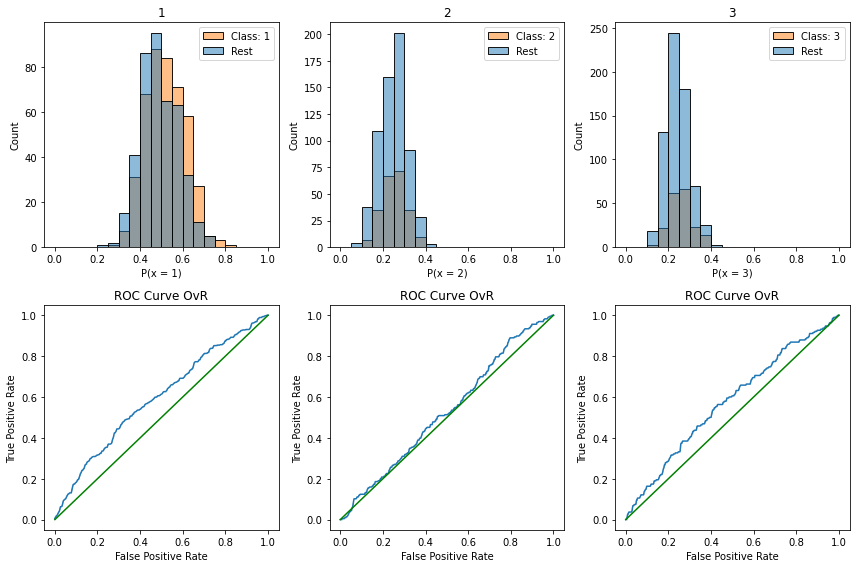

In [104]:
## ROC and AUC curve for multi-class problem

## OvR method ##

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = model_rfe.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    #df_aux = X_test.copy()
    df_aux = pd.DataFrame(columns=['class','prob'])
    #for y in y_test:
     #   if y == c:
      #      df_aux['class'] = 1
       # if y != c:
        #    df_aux['class'] = 0
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    #df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()


In [ ]:
## OvO

#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

#loading the dataset
car_df = pd.read_csv("car.data", names=['buying','maint','doors','persons','lug_boot','safety','class'], sep=",")

#encoding categorical fetures and target variable
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(car_df[features])
car_df_encoded = pd.DataFrame(data_encoded, columns=features)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(car_df['class'])
car_df_encoded['class'] = target_encoded

#train and test split
X_train, X_test, y_train, y_test = train_test_split(car_df_encoded.drop('class', axis=1), car_df_encoded['class'], test_size=0.3, random_state=143)

#train the model
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

#predicting the data
y_pred_cnb = gnb.predict(X_test)
y_prob_pred_cnb = gnb.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')




In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    